<a href="https://colab.research.google.com/github/Aliahmadjangohar/Aliahmadjangohar/blob/main/Text_Preprocessing_for_NLP_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

defined several variables related to text processing and training a machine learning model for natural language processing tasksText

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

The code we provided is a shell command using wget to download a JSON file named "sarcasm.json" from a specified URL and save it to the "/tmp/" directory. Here's a breakdown of the command

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2023-08-22 10:34:46--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 74.125.134.128, 74.125.139.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2023-08-22 10:34:46 (95.0 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



import libraries


In [ ]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

reads the contents of the "sarcasm.json" file, which appears to contain data related to headlines and their corresponding labels (whether they are sarcastic or not). It loads this data into two lists, sentences and labels, by iterating through the JSON data

In [ ]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])


 splitting our data into training and testing sets. This is a common practice in machine learning to evaluate the performance of a model.

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

 the Tokenizer and pad_sequences functions to prepare your text data for training a neural network model

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


training the model


In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 5s - loss: 0.6663 - accuracy: 0.5941 - val_loss: 0.5855 - val_accuracy: 0.7508 - 5s/epoch - 8ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4301 - accuracy: 0.8310 - val_loss: 0.3833 - val_accuracy: 0.8374 - 3s/epoch - 5ms/step
Epoch 3/30
625/625 - 4s - loss: 0.3074 - accuracy: 0.8766 - val_loss: 0.3524 - val_accuracy: 0.8504 - 4s/epoch - 6ms/step
Epoch 4/30
625/625 - 4s - loss: 0.2570 - accuracy: 0.8990 - val_loss: 0.3449 - val_accuracy: 0.8551 - 4s/epoch - 6ms/step
Epoch 5/30
625/625 - 3s - loss: 0.2213 - accuracy: 0.9136 - val_loss: 0.3421 - val_accuracy: 0.8569 - 3s/epoch - 5ms/step
Epoch 6/30
625/625 - 3s - loss: 0.1941 - accuracy: 0.9266 - val_loss: 0.3501 - val_accuracy: 0.8545 - 3s/epoch - 5ms/step
Epoch 7/30
625/625 - 4s - loss: 0.1722 - accuracy: 0.9345 - val_loss: 0.3636 - val_accuracy: 0.8556 - 4s/epoch - 7ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1537 - accuracy: 0.9432 - val_loss: 0.3797 - val_accuracy: 0.8536 - 3s/epoch - 5ms/step
Epoch 9/30
625/625 - 3s 

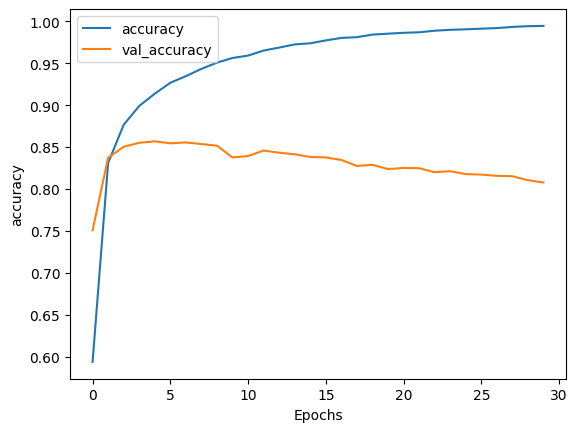

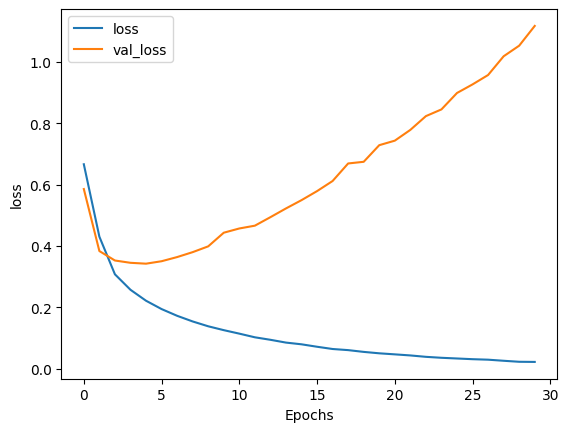

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 110ms/step
[[9.5977408e-01]
 [3.3182063e-05]]
